# STUDENT PERFORMANCE INDICATOR

## Lifecycle of a Machine Learning Project
-  Understanding the Problem Statement
-  Data Collection
-  Data Checks
-  Exploratory Data Analysis
-  Data Pre-Processing
-  Model Training
-  Choose Best Model

## 1) Problem Statement
- This project understands how the student's performance is affected by variables such as gender, ethinicity, parental level of education, Lunch and Test Preparation

## 2) Data Collection
- source - https://www.kaggle.com/datasets/spscientist/students-performance-in-exams?select=StudentsPerformance.csv

## 2.1) Importing Libraries 

In [85]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

## 2.2) Reading the dataset in a pandas dataframe

In [4]:
df=pd.read_csv('StudentsPerformance.csv')

## Showing top 5 records

In [5]:
df.head(5)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


## 3.) Data Checks
- Check Missing values
- Check Duplicates
- Check Data type
- Check the number of unique values in each column
- Check statistics
- Check various categories in different categorical columns

In [6]:
df.isna().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

There are no missing values

In [7]:
df.duplicated().sum()

0

No duplicates found

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


## Checking uniques values in each column

In [9]:
df.nunique()

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     81
reading score                  72
writing score                  77
dtype: int64

## Check Statistics

In [10]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


- From above description, all means are in the range of 66 to 69, very close to each other
- All Standard deviations are very close, which means the variance is not large
- Minimum score for math is 0 but reading and writing score are 17.0 and 10.0 respectively 

## Exploratory Data Analysis

In [11]:
print("Categories in 'gender' variable :",end=" ")
print(df['gender'].unique())
print("Categories in 'race/ethnicity' variable :",end=" ")
print(df['race/ethnicity'].unique())
print("Categories in 'parental level of education' variable :",end=" ")
print(df['parental level of education'].unique())
print("Categories in 'lunch' variable :",end=" ")
print(df['lunch'].unique())
print("Categories in 'test preparation course' variable :",end=" ")
print(df['test preparation course'].unique())

Categories in 'gender' variable : ['female' 'male']
Categories in 'race/ethnicity' variable : ['group B' 'group C' 'group A' 'group D' 'group E']
Categories in 'parental level of education' variable : ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in 'lunch' variable : ['standard' 'free/reduced']
Categories in 'test preparation course' variable : ['none' 'completed']


In [12]:
#Defining numerical and categorical columns
numerical_features= [feature for feature in df.columns if df[feature].dtype!='O']
categorical_features=[feature for feature in df.columns if df[feature].dtype=='O']

#Print columns
print('We have {} numerical features : {}'.format(len(numerical_features), numerical_features))
print('\nWe have {} categorical features : {}'.format(len(categorical_features), categorical_features))

We have 3 numerical features : ['math score', 'reading score', 'writing score']

We have 5 categorical features : ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']


## Feature Engineering

Adding columns for total score and average

In [13]:
df['totalscore']=df['math score'] + df['writing score'] + df['reading score']
df['average']= df['totalscore']/3
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,totalscore,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [21]:
#Students scoring full marks
reading_full=df[df['reading score']==100]['average'].count()
writing_full=df[df['writing score']==100]['average'].count()
math_full=df[df['math score']==100]['average'].count()

print(f'Number of students who got full reading score are :{reading_full}')
print(f'Number of students who got full writing score are :{writing_full}')
print(f'Number of students who got full math score are :{math_full}')

Number of students who got full reading score are :17
Number of students who got full writing score are :14
Number of students who got full math score are :7


In [16]:
#Students scoring less than 20
reading_low=df[df['reading score']<=20]['average'].count()
writing_low=df[df['writing score']<=20]['average'].count()
math_low=df[df['math score']<=20]['average'].count()

print(f'Number of students who got less than 20 reading score are :{reading_low}')
print(f'Number of students who got less than 20 writing score are :{writing_low}')
print(f'Number of students who got less than 20 math score are :{math_low}')

Number of students who got less than 20 reading score are :1
Number of students who got less than 20 writing score are :3
Number of students who got less than 20 math score are :4


## Insights
- Best performance was captured in Reading
- Worst performance was in Mathematics

## Visualization
Histogram and KDE

## Distribution of average score with gender

<Axes: xlabel='average', ylabel='Count'>

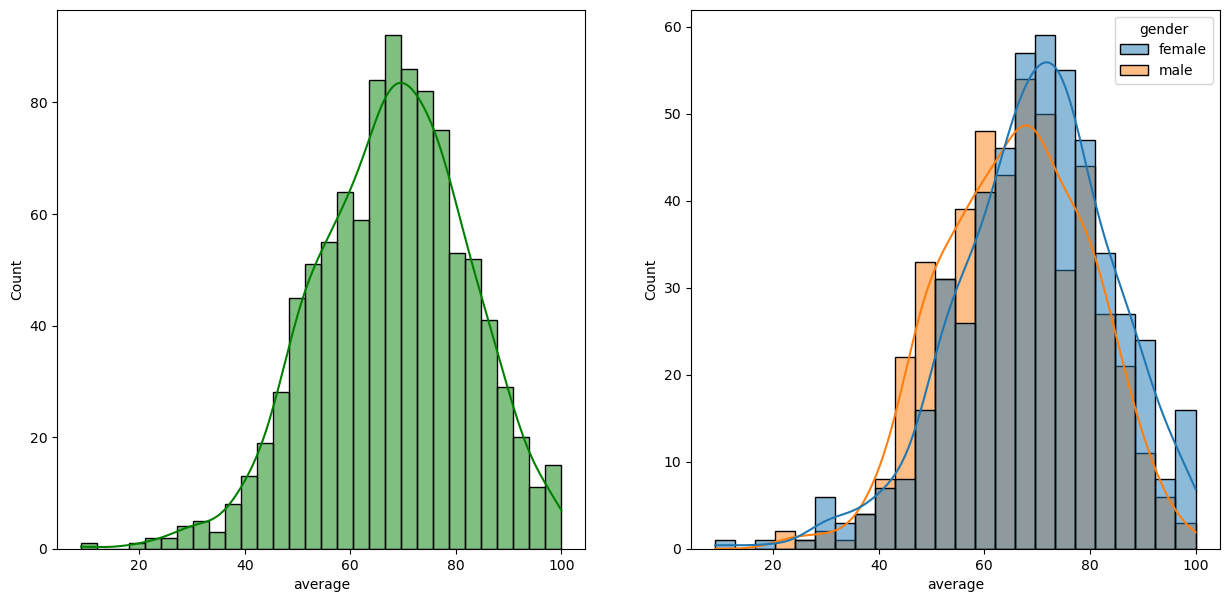

In [31]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(data=df, x='average', bins=30, kde=True, color='g')
plt.subplot(122)
sns.histplot(data=df,x='average', hue='gender',kde=True)

## Insight
Female tend to have higher average score than males

## Distribution of gender with total score

<Axes: xlabel='totalscore', ylabel='Count'>

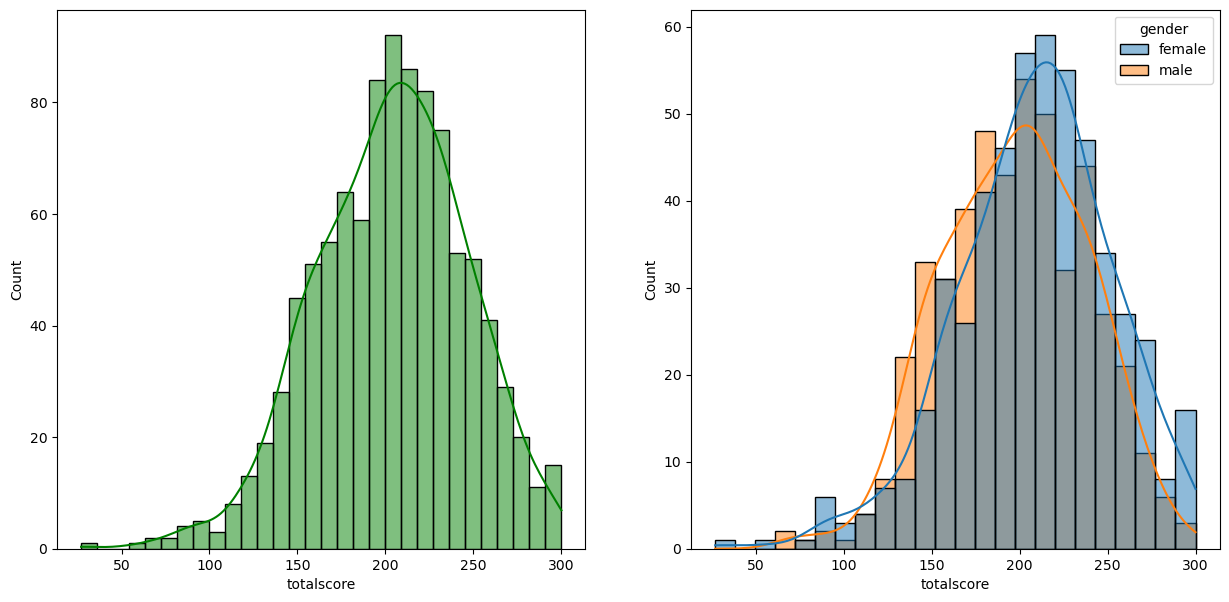

In [33]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(data=df, x='totalscore', bins=30, kde=True, color='g')
plt.subplot(122)
sns.histplot(data=df,x='totalscore', hue='gender',kde=True)

## Insight
Female tend to have higher total scores than males

## Distribution of gender with lunch

<Axes: xlabel='average', ylabel='Count'>

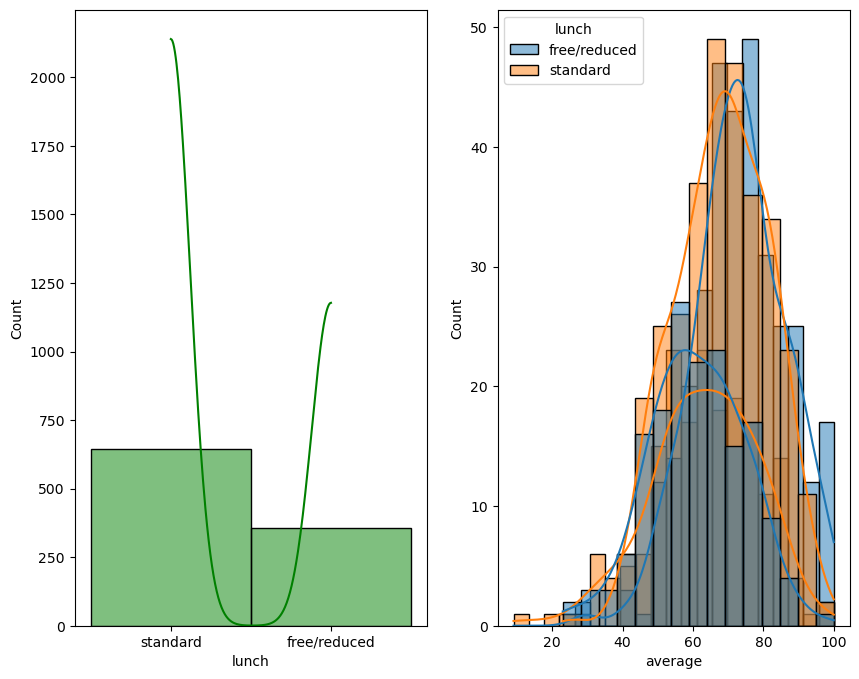

In [35]:
fig, axs = plt.subplots(1, 2, figsize=(10,8))
plt.subplot(121)
sns.histplot(data=df, x='lunch', bins=30, kde=True, color='g')
plt.subplot(122)
sns.histplot(data=df[df.gender=='female'],x='average', hue='lunch',kde=True)
sns.histplot(data=df[df.gender=='male'],x='average', hue='lunch',kde=True)

## Insight
Standard lunch performs well in exams for male and females

## Distribution of gender with parental education

<Axes: xlabel='average', ylabel='Count'>

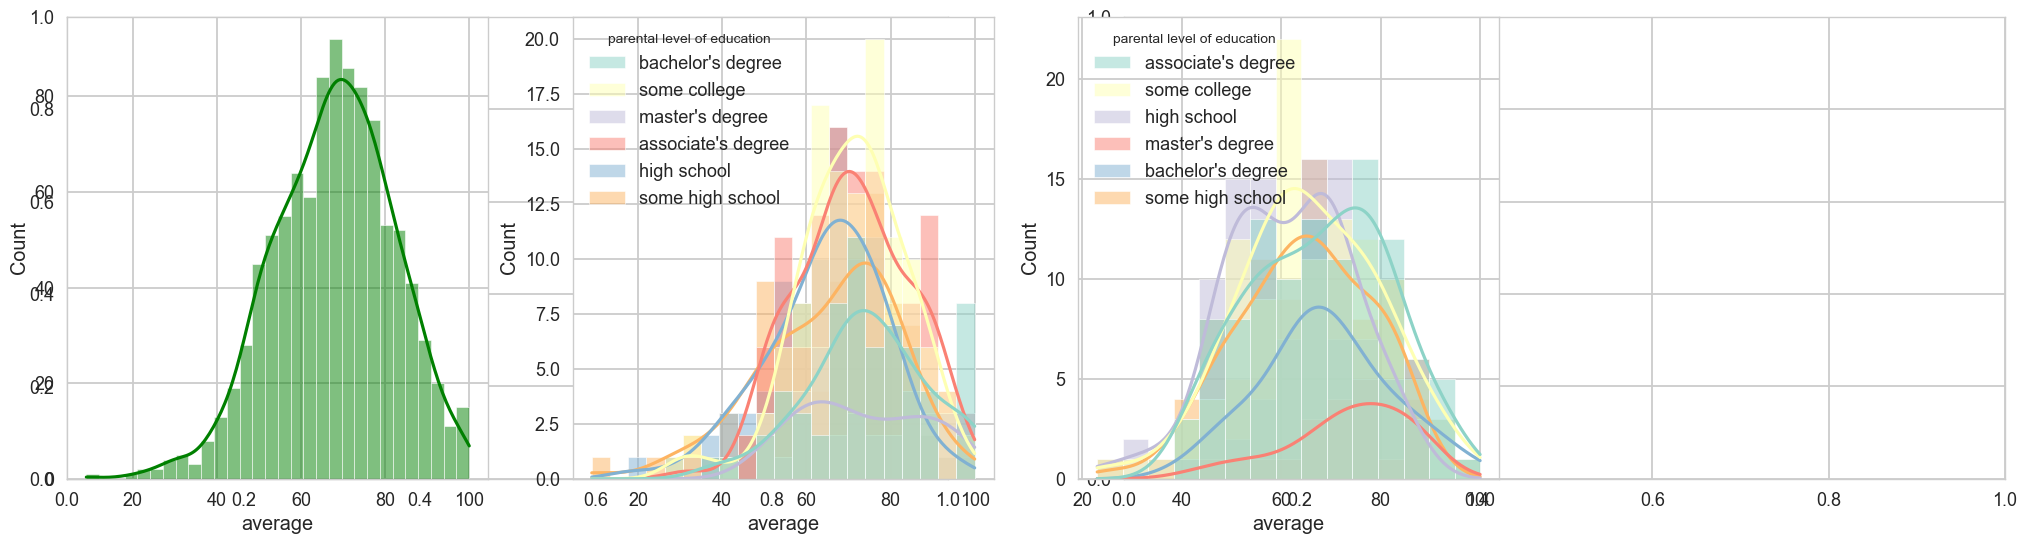

In [65]:
fig, axs = plt.subplots(1, 2, figsize=(25,6))
plt.subplot(141)
sns.histplot(data=df, x='average', bins=30, kde=True, color='g')
plt.subplot(142)
sns.histplot(data=df[df.gender=='female'],x='average', hue='parental level of education',kde=True)
plt.subplot(143)
sns.histplot(data=df[df.gender=='male'],x='average', hue='parental level of education',kde=True)

## Insights
- Parental level of education does not matter much in success
- In the 2nd and 3rd plot master's and some college help in students performance

## UNIVARIATE ANALYSIS
Does lunch type has any effect on student performance?

<function matplotlib.pyplot.show(close=None, block=None)>

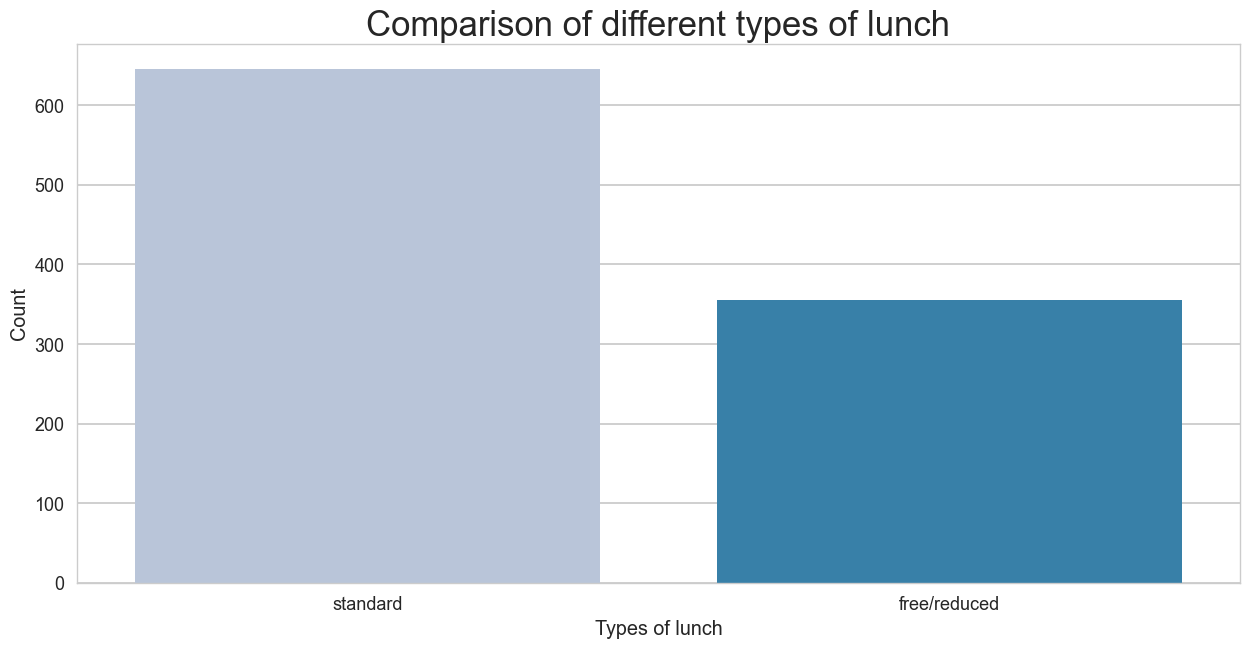

In [51]:
plt.rcParams['figure.figsize']=(15,7)
plt.style.use('seaborn-v0_8-whitegrid')
order=['standard', 'free/reduced']
sns.countplot(data=df, x='lunch',order=order,palette='PuBu')
plt.title('Comparison of different types of lunch',fontweight=30, fontsize=25)
plt.xlabel('Types of lunch')
plt.ylabel('Count')
plt.show

Does gender have any effect on student performance

<function matplotlib.pyplot.show(close=None, block=None)>

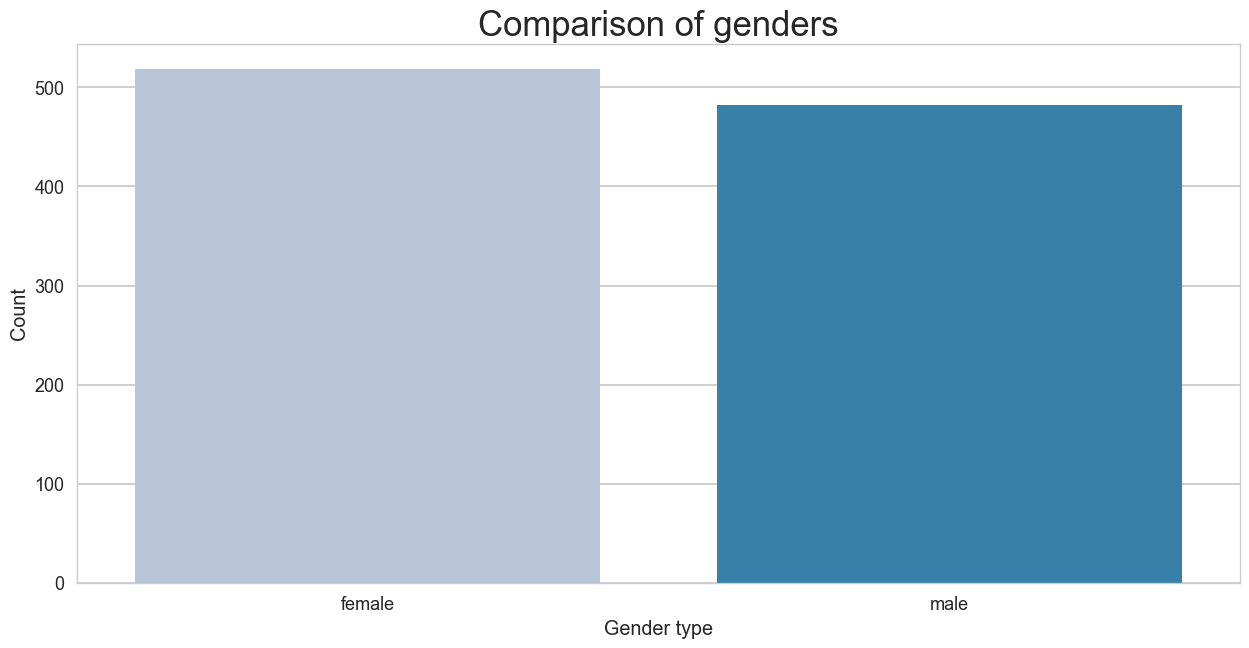

In [52]:
plt.rcParams['figure.figsize']=(15,7)
plt.style.use('seaborn-v0_8-whitegrid')
order=['female','male']
sns.countplot(data=df, x='gender',order=order, palette='PuBu')
plt.title('Comparison of genders',fontweight=30, fontsize=25)
plt.xlabel('Gender type')
plt.ylabel('Count')
plt.show

## Univariate ANALYSIS
How is distrubution of gender

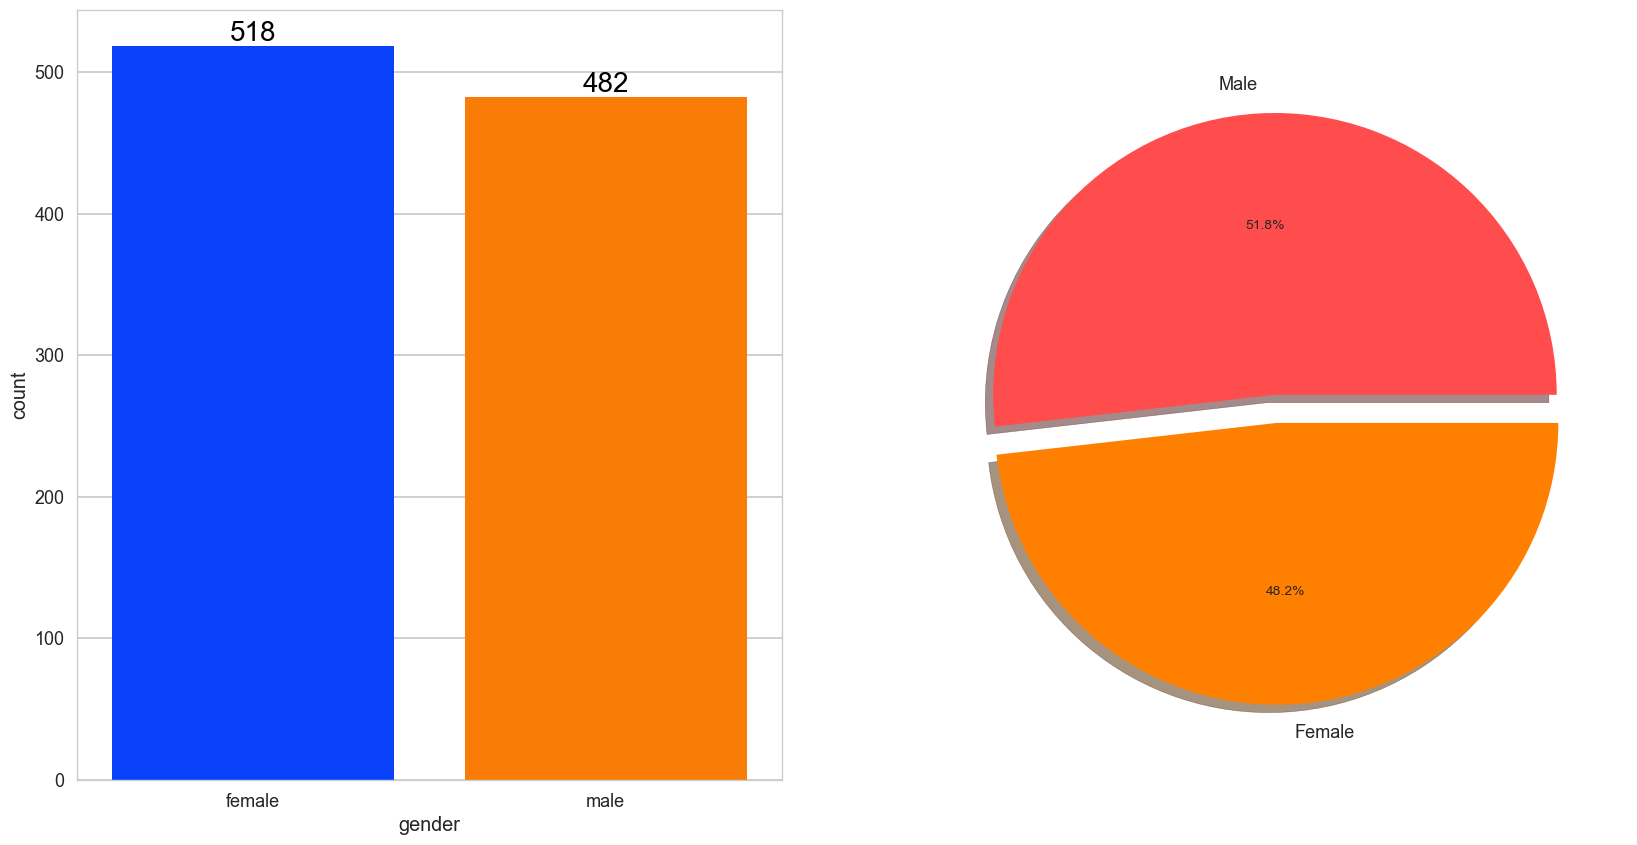

In [73]:
f,ax=plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=df['gender'],data=df,palette ='bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
plt.pie(x=df['gender'].value_counts(),labels=['Male','Female'],explode=[0,0.1],autopct='%1.1f%%',shadow=True,colors=['#ff4d4d','#ff8000'])
plt.show()


## Insight
- Gender data is balanced with 518 females to 482 males

## Bivariate Analysis 
Is gender impacting student performance

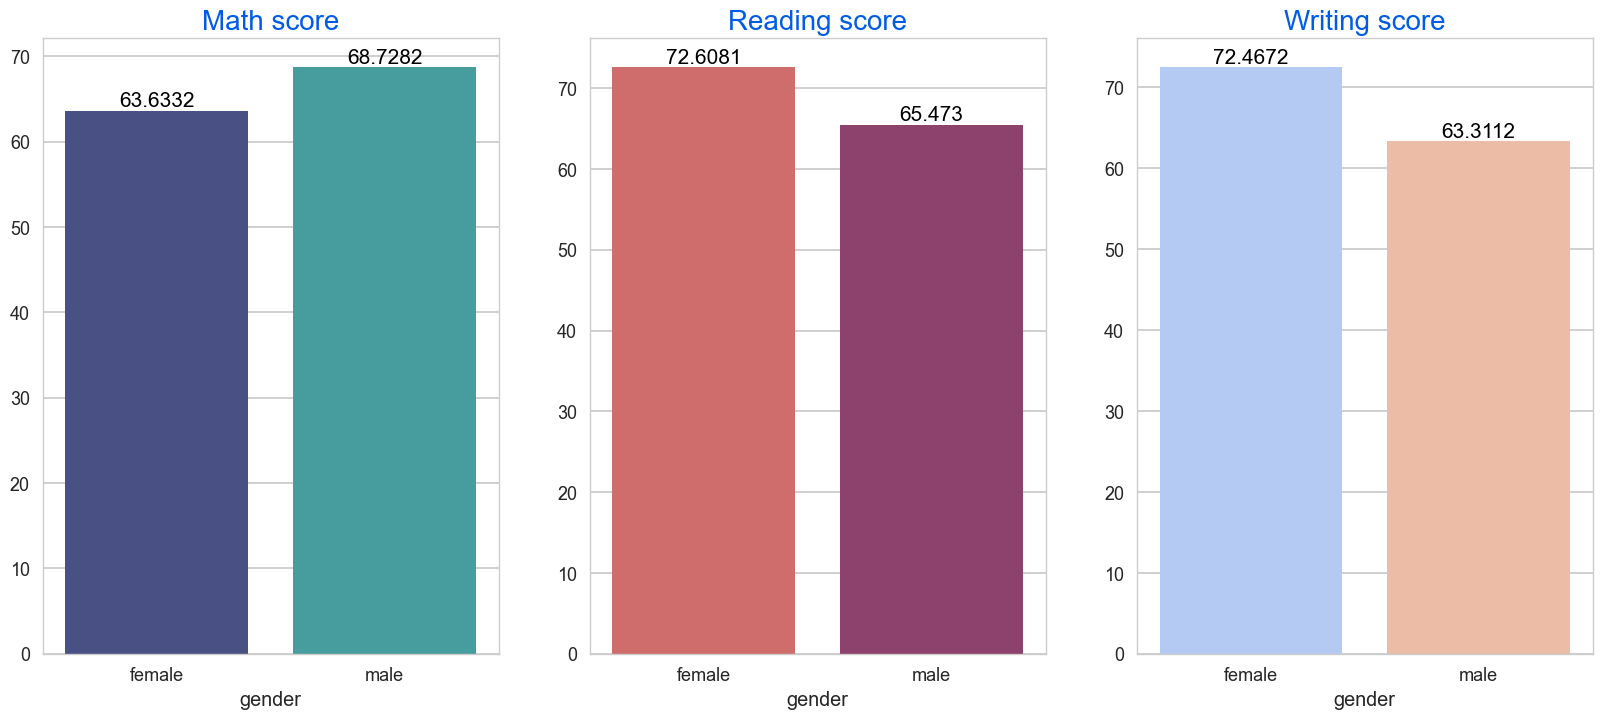

In [84]:
Group_data=df.groupby('gender')
f,ax=plt.subplots(1,3,figsize=(20,8))
sns.barplot(x=Group_data['math score'].mean().index,y=Group_data['math score'].mean().values,palette = 'mako',ax=ax[0])
ax[0].set_title('Math score',color='#005ce6',size=20)

for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=15)

sns.barplot(x=Group_data['reading score'].mean().index,y=Group_data['reading score'].mean().values,palette = 'flare',ax=ax[1])
ax[1].set_title('Reading score',color='#005ce6',size=20)

for container in ax[1].containers:
    ax[1].bar_label(container,color='black',size=15)

sns.barplot(x=Group_data['writing score'].mean().index,y=Group_data['writing score'].mean().values,palette = 'coolwarm',ax=ax[2])
ax[2].set_title('Writing score',color='#005ce6',size=20)

for container in ax[2].containers:
    ax[2].bar_label(container,color='black',size=15)

## Insights
- Overall females performaned better than males except Mathematics

## Bivariate Analysis 
Is race/ethinicity impacting student performance

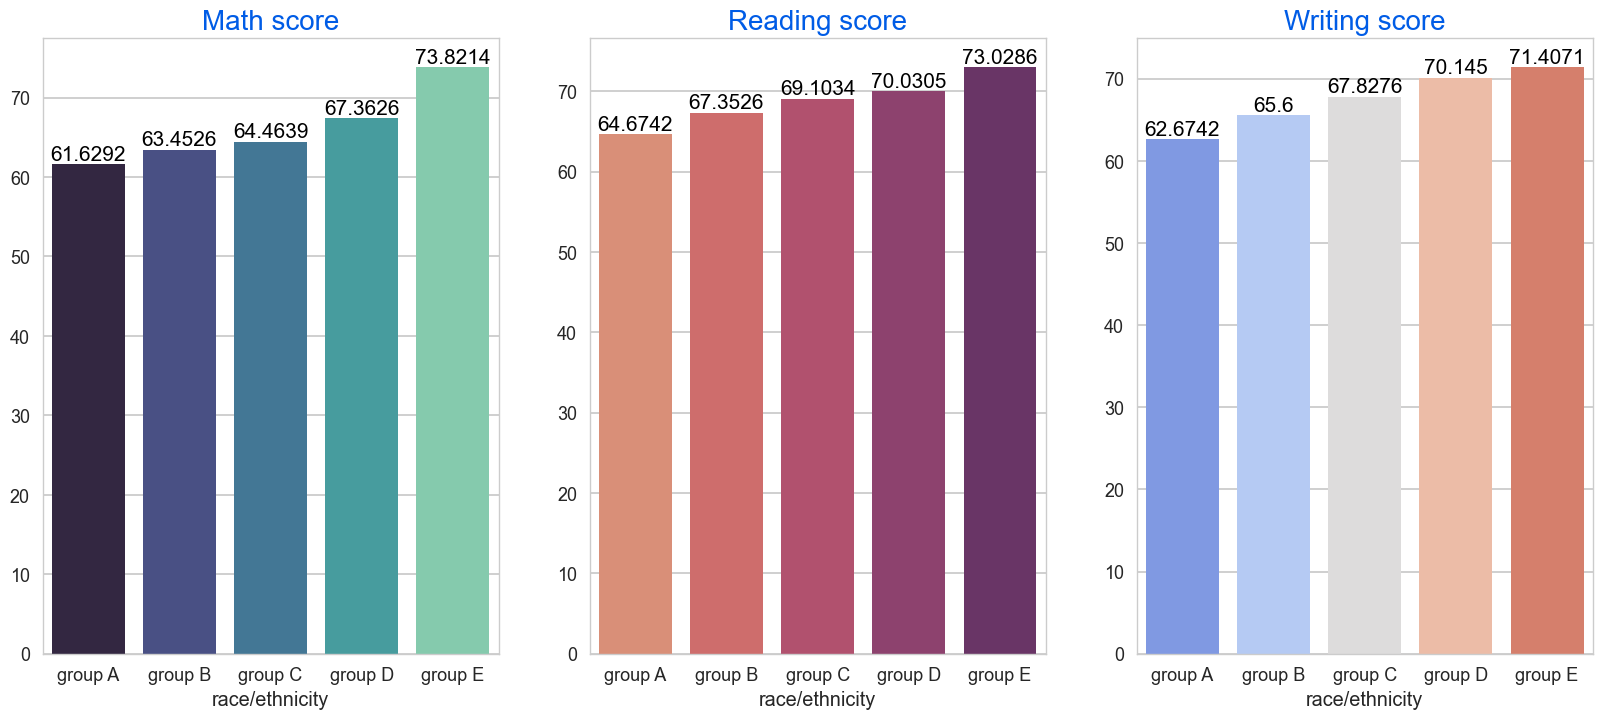

In [76]:
Group_data2=df.groupby('race/ethnicity')
f,ax=plt.subplots(1,3,figsize=(20,8))
sns.barplot(x=Group_data2['math score'].mean().index,y=Group_data2['math score'].mean().values,palette = 'mako',ax=ax[0])
ax[0].set_title('Math score',color='#005ce6',size=20)

for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=15)

sns.barplot(x=Group_data2['reading score'].mean().index,y=Group_data2['reading score'].mean().values,palette = 'flare',ax=ax[1])
ax[1].set_title('Reading score',color='#005ce6',size=20)

for container in ax[1].containers:
    ax[1].bar_label(container,color='black',size=15)

sns.barplot(x=Group_data2['writing score'].mean().index,y=Group_data2['writing score'].mean().values,palette = 'coolwarm',ax=ax[2])
ax[2].set_title('Writing score',color='#005ce6',size=20)

for container in ax[2].containers:
    ax[2].bar_label(container,color='black',size=15)

## Insight
- Group E performs fairly well in reading, math and writing and group A is lowest in all the metrics.
- Mean range for every race is in all departments is around 65.

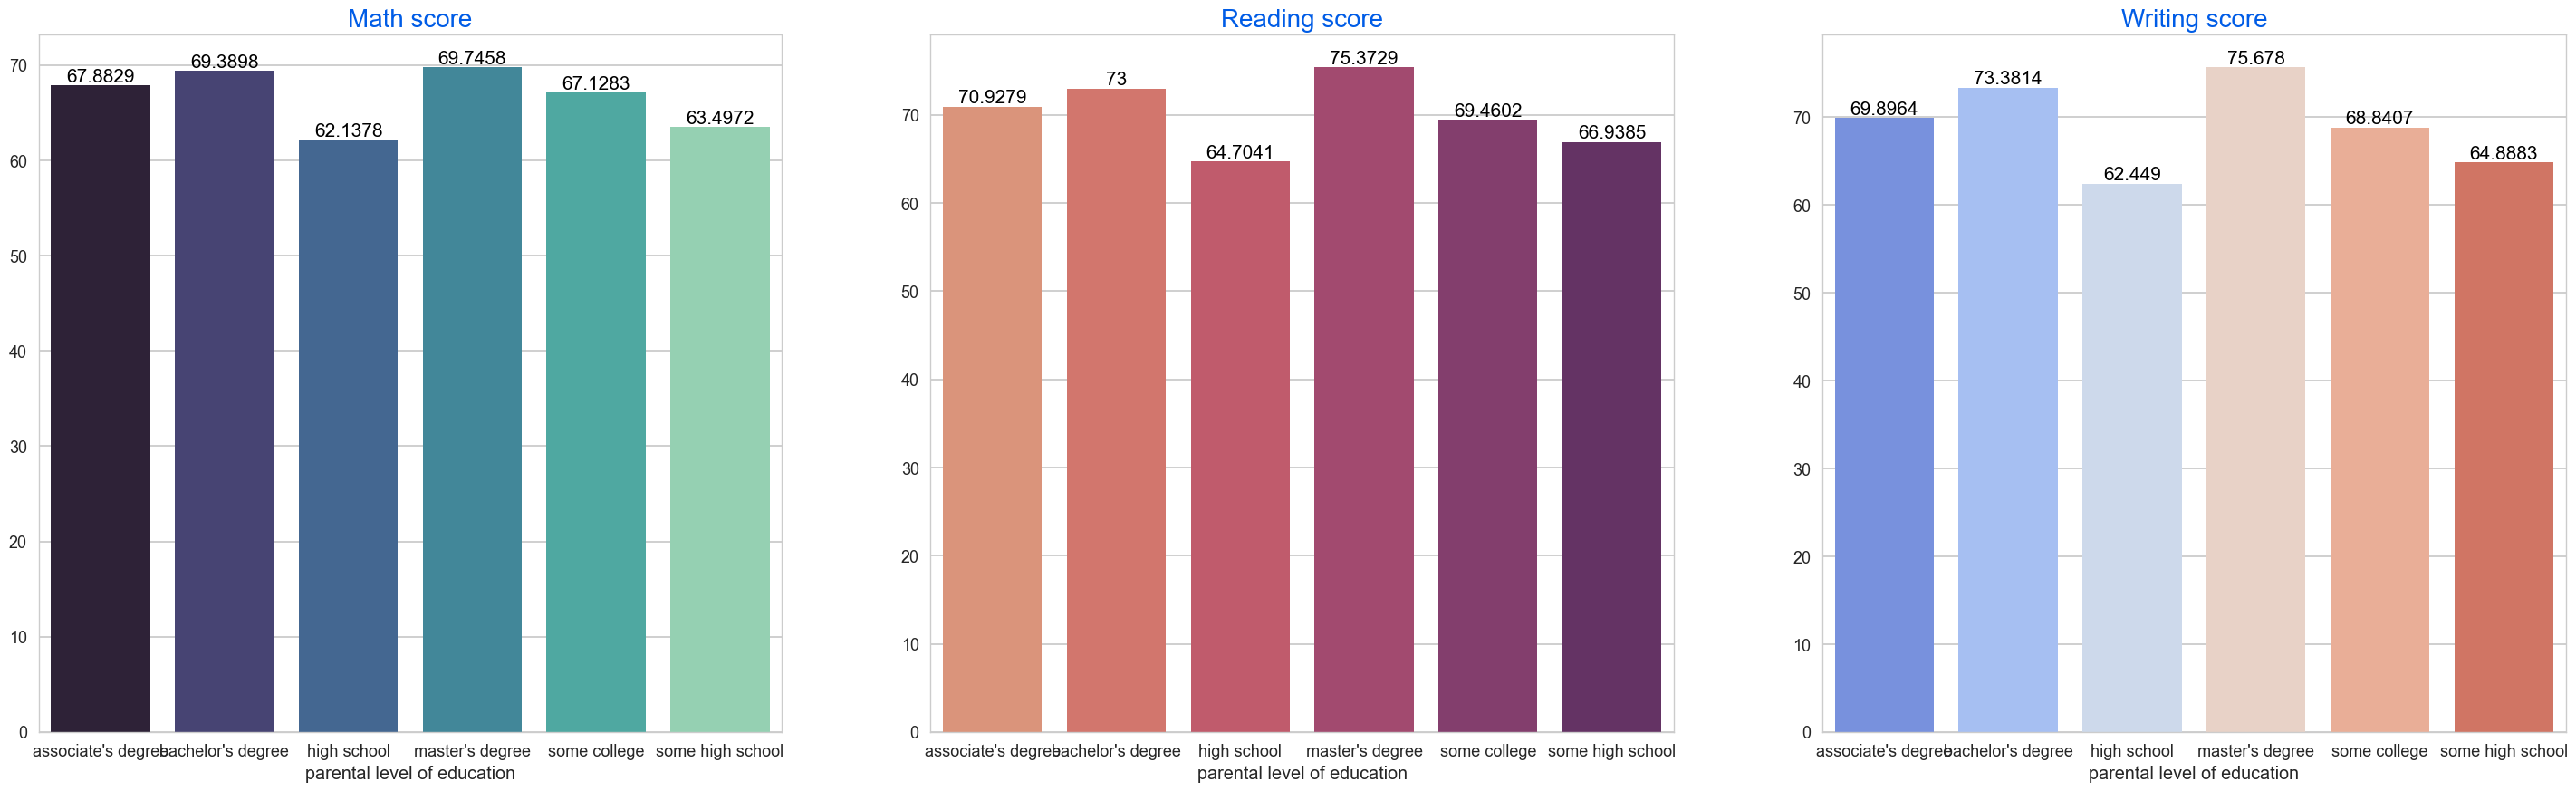

In [81]:
Group_data3=df.groupby('parental level of education')
f,ax=plt.subplots(1,3,figsize=(36,10))
sns.barplot(x=Group_data3['math score'].mean().index,y=Group_data3['math score'].mean().values,palette = 'mako',ax=ax[0])
ax[0].set_title('Math score',color='#005ce6',size=20)

for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=15)

sns.barplot(x=Group_data3['reading score'].mean().index,y=Group_data3['reading score'].mean().values,palette = 'flare',ax=ax[1])
ax[1].set_title('Reading score',color='#005ce6',size=20)

for container in ax[1].containers:
    ax[1].bar_label(container,color='black',size=15)

sns.barplot(x=Group_data3['writing score'].mean().index,y=Group_data3['writing score'].mean().values,palette = 'coolwarm',ax=ax[2])
ax[2].set_title('Writing score',color='#005ce6',size=20)

for container in ax[2].containers:
    ax[2].bar_label(container,color='black',size=15)

## Insights 
- Parents who have a master's degree their kids have scored well in all areas.
- Parents with education upto highschool level shows a low performance in students


## Checking outliers


<function matplotlib.pyplot.show(close=None, block=None)>

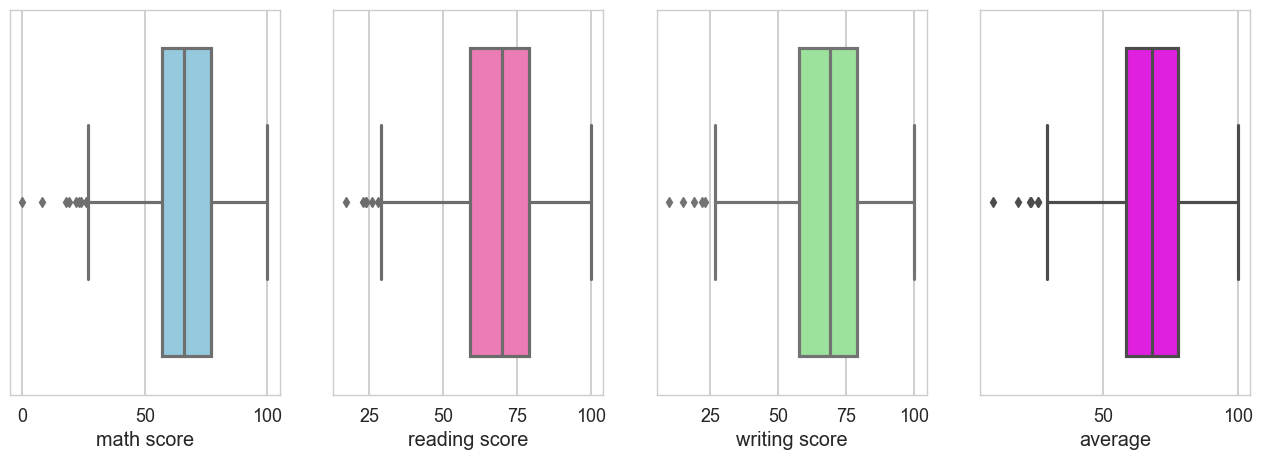

In [83]:
plt.subplots(1,4,figsize=(16,5))
plt.subplot(141)
sns.boxplot(x=df['math score'],color='skyblue')
plt.subplot(142)
sns.boxplot(x=df['reading score'],color ='hotpink')
plt.subplot(143)
sns.boxplot(x=df['writing score'],color ='lightgreen')
plt.subplot(144)
sns.boxplot(x=df['average'],color ='magenta')
plt.show



## Insight
- Significant number of outliers can be seen in every area

# Conclusions
- Females have higher total score and average score in every area
- Student perfor"mance is affected by lunch, parental level of education, race/ethnicity
- Outliers are visible in all areas(math, reading and writing), not removing as it might impact modeling